# Introduction

Hello everyone! This is my data analysis with the video game sales dataset. I am actually very excited to explore more about this dataset because I am myself a video game fan. So let's load the data and take a quick look!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


In [2]:
full_data = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')

In [3]:
full_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
print(full_data.columns.unique())
len(full_data.columns.unique())

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


11

In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
print(full_data.columns[full_data.isna().any()].unique())
len(full_data.columns[full_data.isna().any()].unique())

Index(['Year', 'Publisher'], dtype='object')


2

OK, so we see that this dataset contains 11 columns of information.


**The columns are:**

* Rank - Ranking of overall sales, integer

* Name - The games name

* Platform - Platform of the games release (i.e. PC,PS4, etc.), object

* Year - Year of the game's release, float

* Genre - Genre of the game ,object

* Publisher - Publisher of the game, object

* NA_Sales - Sales in North America (in millions), float

* EU_Sales - Sales in Europe (in millions), float

* JP_Sales - Sales in Japan (in millions), float

* Other_Sales - Sales in the rest of the world (in millions), float

* Global_Sales - Total worldwide sales, float


We also see that two of the columns contain missing values. Let's take a quick look at these two columns.

**Year**

In [7]:
full_data['Year'].isna().sum()

271

In [8]:
full_data['Year'].isna().sum() / full_data['Year'].count() * 100

1.6598272799657012

Since only 1.6% of the data has missing values, I think it is OK to fill the missing value. So let's take a deeper look at the data and how we can impute missing values.

In [9]:
full_data.loc[full_data['Year'].isna()].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


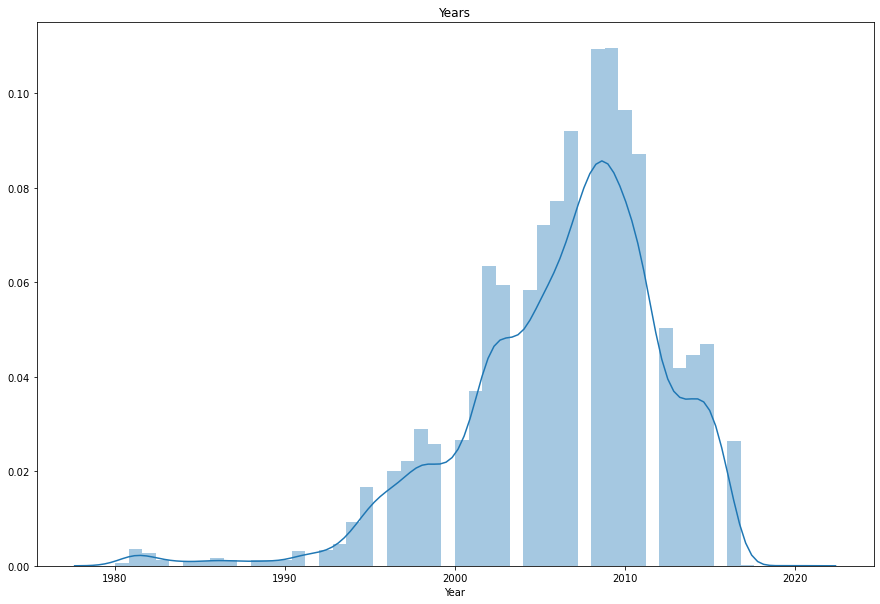

2009.0    8.764623
2008.0    8.746249
2010.0    7.711153
2007.0    7.362038
2011.0    6.976174
2006.0    6.173823
2005.0    5.763459
2002.0    5.077479
2003.0    4.746739
2004.0    4.673241
2012.0    4.024009
2015.0    3.760642
2014.0    3.564648
2013.0    3.344154
2001.0    2.952165
1998.0    2.321308
2000.0    2.137564
2016.0    2.106939
1999.0    2.070190
1997.0    1.770074
1996.0    1.610829
1995.0    1.341336
1994.0    0.741104
1993.0    0.367489
1981.0    0.281742
1992.0    0.263367
1991.0    0.251118
1982.0    0.220494
1986.0    0.128621
1989.0    0.104122
1983.0    0.104122
1990.0    0.097997
1987.0    0.097997
1988.0    0.091872
1985.0    0.085748
1984.0    0.085748
1980.0    0.055123
2017.0    0.018374
2020.0    0.006125
Name: Year, dtype: float64

In [10]:
plt.figure(figsize=(15, 10))
plt.title("Years")
sns.distplot(a=full_data['Year'])
plt.show()

full_data['Year'].value_counts() / full_data['Year'].dropna().count() * 100

Since there is not a single year that is very common, I will not fill missing values with the median or something similar. Instead, let's see if we can use a classifier to predict missing values. First, let's see which columns are most correlated with Years:

In [11]:
year_corr = full_data.corr()["Year"]
year_corr.abs().sort_values(ascending=False)[1:]

Rank            0.178814
JP_Sales        0.169316
NA_Sales        0.091402
Global_Sales    0.074735
Other_Sales     0.041058
EU_Sales        0.006014
Name: Year, dtype: float64

So Rank and JP_Sales are the two numerical variables that are correlated with Year. Let's now see if there are categorical variables that are correlated:

**Platform**

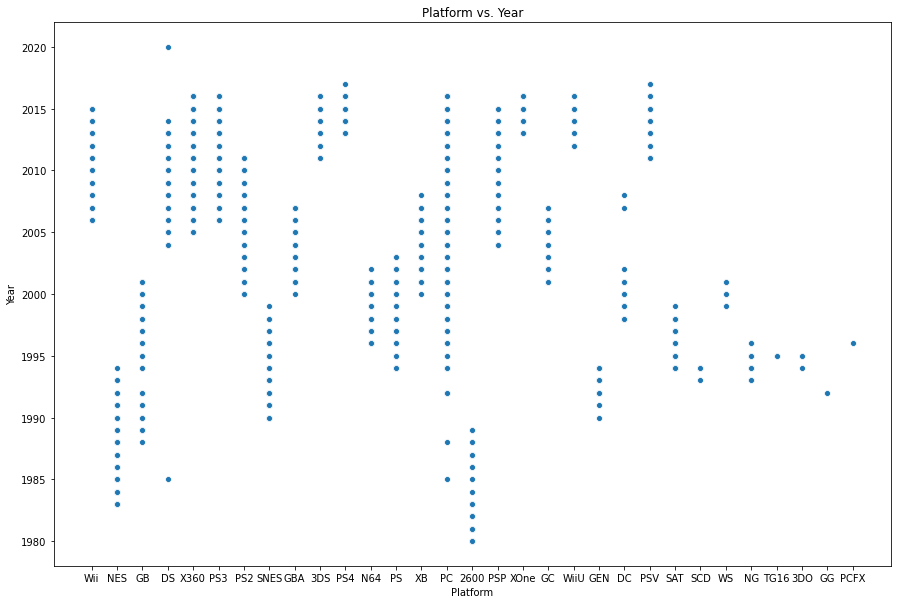

In [12]:
plt.figure(figsize=(15, 10))
plt.title("Platform vs. Year")
sns.scatterplot(x=full_data['Platform'], y=full_data['Year'])
plt.show()

I cannot see a trend here, so I will conclude these two variables aren't really associated.

**Genre**

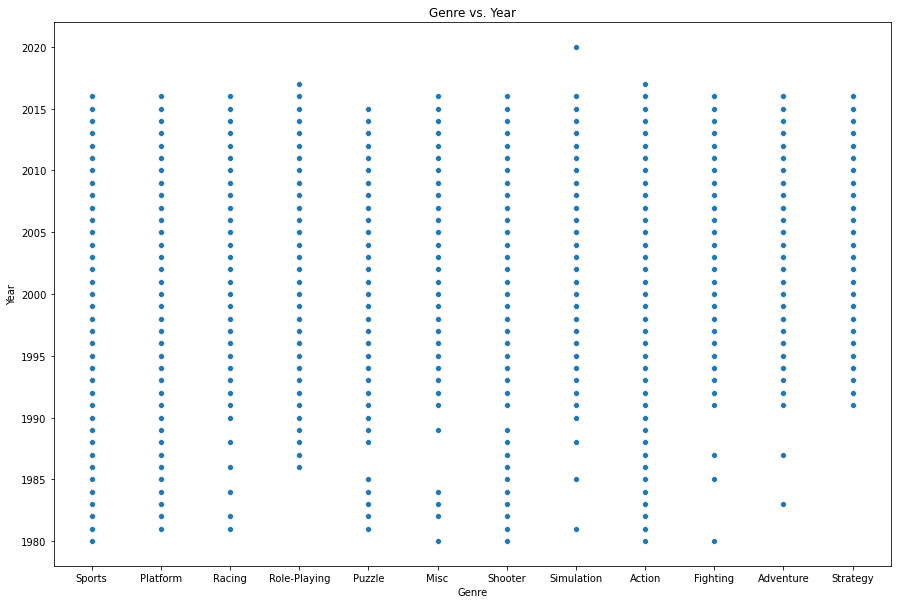

In [13]:
plt.figure(figsize=(15, 10))
plt.title("Genre vs. Year")
sns.scatterplot(x=full_data['Genre'], y=full_data['Year'])
plt.show()

Again, I cannot see a trend. It seems like each year there are games with every genre created.

**Publisher**

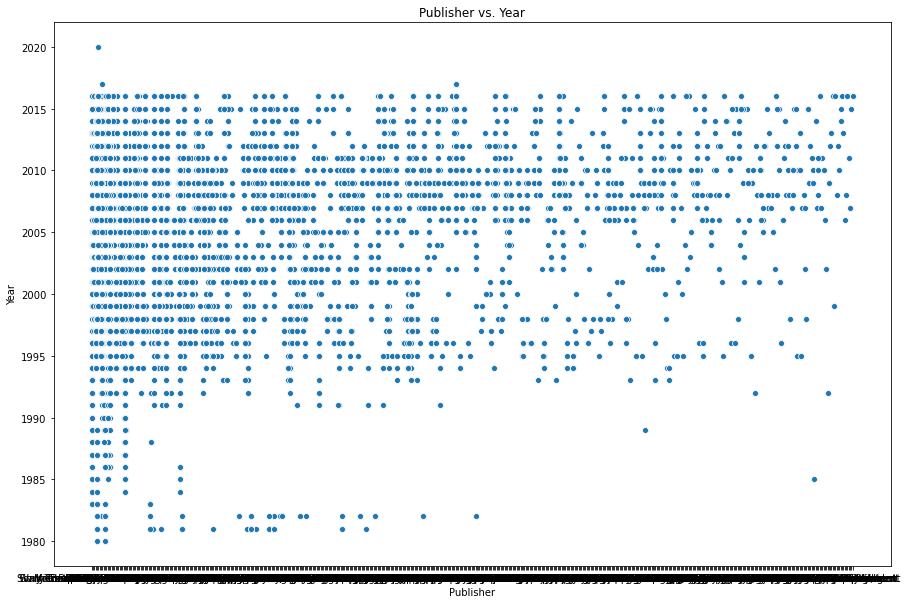

In [14]:
plt.figure(figsize=(15, 10))
plt.title("Publisher vs. Year")
sns.scatterplot(x=full_data['Publisher'], y=full_data['Year'])
plt.show()

Although not very clear, we can see that certain publishers never released games during 1980s. So publisher perhaps can be an useful variable to add to our model.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

year_num_features = ['Rank', 'JP_Sales']
year_cat_features = ['Publisher']
year_features = year_num_features + year_cat_features

num_transformer = SimpleImputer(strategy="constant")

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[("num", num_transformer, year_num_features),
                                               ("cat", cat_transformer, year_cat_features)])

year_X = full_data.dropna()[year_features]
year_Y = full_data.dropna()['Year']

year_X_train, year_X_test, year_y_train, year_y_test = train_test_split(year_X, year_Y, test_size=0.33, random_state=42)

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


base_models = [("Ada_model", AdaBoostClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42)),
               ("KN_model", KNeighborsClassifier())]

kfolds = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

for name, model in base_models:
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    
    model_steps.fit(year_X_train, year_y_train)

    model_preds = model_steps.predict(year_X_test)

    print(f"{name} accuracy: {accuracy_score(year_y_test, model_preds)}")

Ada_model accuracy: 0.09522038311326018
RF_model accuracy: 0.12516273014692209
KN_model accuracy: 0.05095778315045565


Since Random Forest has the best performance, let's fill missing values using the year it predicts

In [17]:
final_year_X_train = full_data[full_data['Year'].notnull()][year_features]
final_year_y_train = full_data[full_data['Year'].notnull()][['Year']]

final_year_X_test = full_data[full_data['Year'].isnull()][year_features]

In [18]:
model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestClassifier(random_state=42))])

model_steps.fit(final_year_X_train, np.ravel(final_year_y_train))

final_model_preds = model_steps.predict(final_year_X_test)

In [19]:
full_data.loc[full_data['Year'].isnull(), 'Year'] = final_model_preds

In [20]:
full_data['Year'].isna().sum()

0

Now we have successfully filled the missing values in Year using predictions from a Random Forest Classifier.

**Publisher**

In [21]:
full_data['Publisher'].isna().sum()

58

In [22]:
print(len(full_data['Publisher'].unique()))
print(full_data['Publisher'].unique())

579
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' nan 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' '989 Studios' 'NCSoft' 'UEP Systems' 'Parker Bros.' 'Maxis'
 'Imagic' 'Tecmo Koei' 'Valve Software' 'ASCII Entertainment' 'Mindscape'
 'Infogrames' 'Unknown' 'Square' 'Valve' 'Activision Value' 'Banpresto'
 'D3Publisher' 'Oxygen Interactive' 'Red Storm Entertai

In [23]:
full_data.loc[full_data['Publisher'].isna()].head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,2000.0,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,2007.0,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,1998.0,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


I don't want to drop data, so here I will just give them a Publisher value of 'Unknown'

In [24]:
full_data.loc[full_data['Publisher'].isna(), 'Publisher'] = 'Unknown'

In [25]:
full_data['Publisher'].isna().sum()

0

# Univariate Data Analysis

Now we have take a quick look at the data. I say we can see more distributions of variables regarding video game sales. (Rank and names obviously don't need to be examined individually)

**Platform**

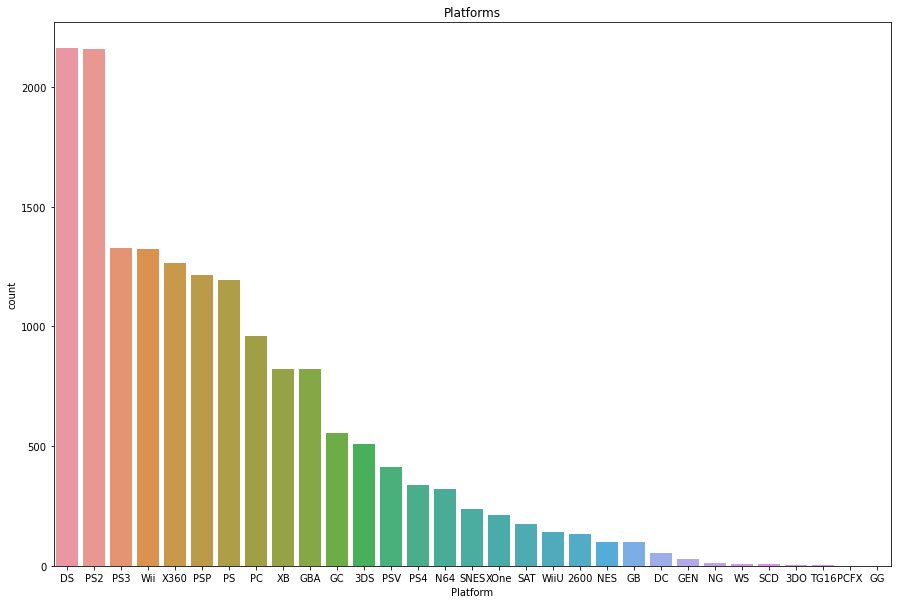

DS      13.031691
PS2     13.019641
PS3      8.006989
Wii      7.982890
X360     7.621400
PSP      7.308109
PS       7.205687
PC       5.783829
XB       4.964454
GBA      4.952404
GC       3.349801
3DS      3.066635
PSV      2.488252
PS4      2.024340
N64      1.921918
SNES     1.439933
XOne     1.283287
SAT      1.042294
WiiU     0.861550
2600     0.801301
NES      0.590433
GB       0.590433
DC       0.313291
GEN      0.162670
NG       0.072298
WS       0.036149
SCD      0.036149
3DO      0.018074
TG16     0.012050
PCFX     0.006025
GG       0.006025
Name: Platform, dtype: float64


In [26]:
plt.figure(figsize=(15, 10))
plt.title("Platforms")
sns.countplot(x=full_data['Platform'], order=full_data['Platform'].value_counts().index)
plt.show()

print(full_data['Platform'].value_counts() / full_data.shape[0] * 100)

So we see that the most popular platforms are like DS, PS2, PS3, PC, and etc. This follows our expectations.

**Year**

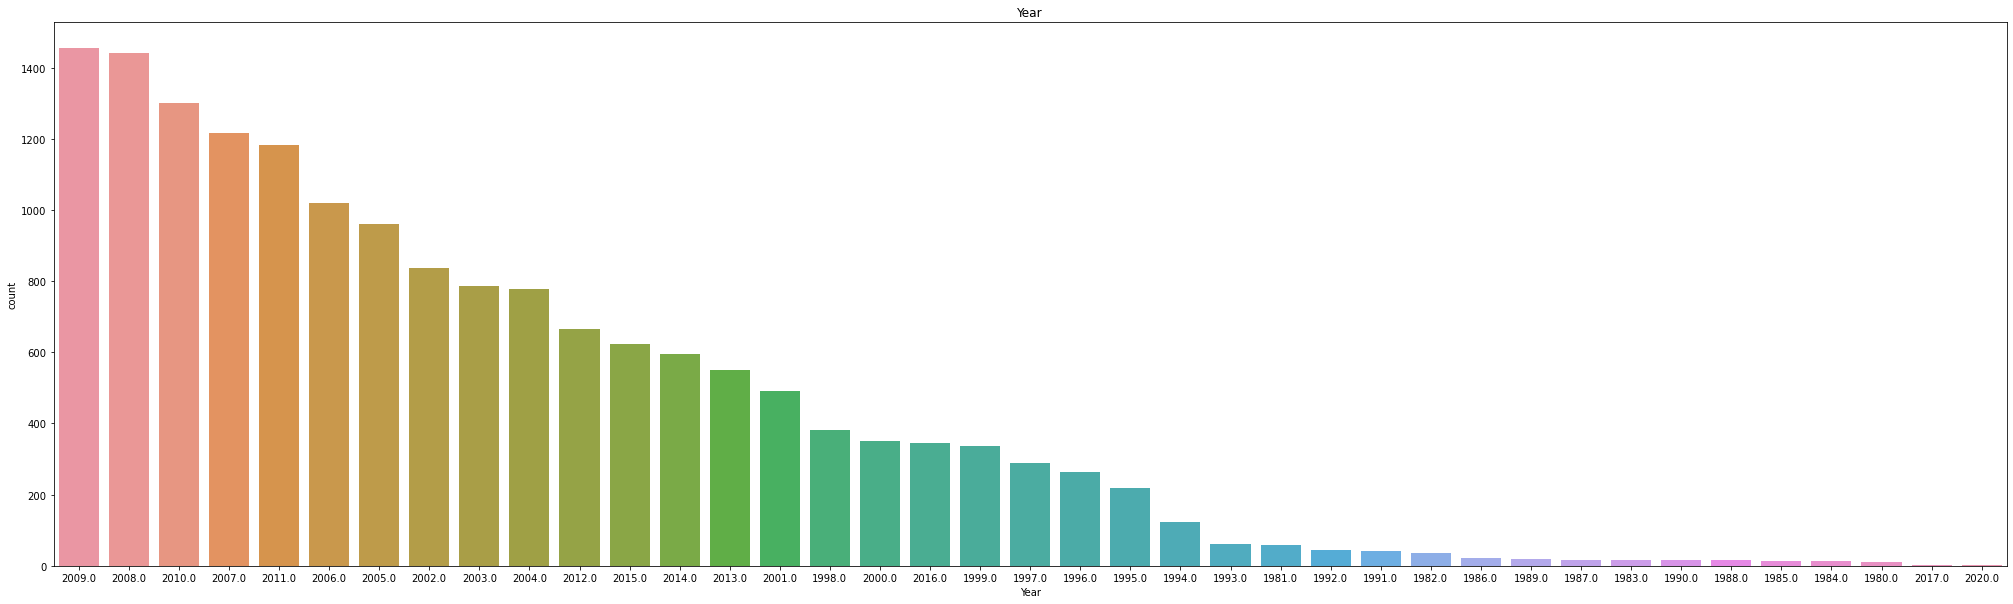

2009.0    8.766116
2008.0    8.675744
2010.0    7.844319
2007.0    7.332209
2011.0    7.121340
2006.0    6.139294
2005.0    5.783829
2002.0    5.048801
2003.0    4.729485
2004.0    4.681287
2012.0    4.006507
2015.0    3.747439
2014.0    3.578744
2013.0    3.307627
2001.0    2.952163
1998.0    2.307507
2000.0    2.120737
2016.0    2.084589
1999.0    2.036390
1997.0    1.747198
1996.0    1.596578
1995.0    1.319436
1994.0    0.735028
1993.0    0.361489
1981.0    0.349440
1992.0    0.265092
1991.0    0.247018
1982.0    0.222918
1986.0    0.126521
1989.0    0.108447
1987.0    0.102422
1983.0    0.102422
1990.0    0.096397
1988.0    0.096397
1985.0    0.084348
1984.0    0.084348
1980.0    0.066273
2017.0    0.018074
2020.0    0.006025
Name: Year, dtype: float64


In [27]:
plt.figure(figsize=(35, 10))
plt.title("Year")
sns.countplot(x=full_data['Year'], order=full_data['Year'].value_counts().index)
plt.show()

print(full_data['Year'].value_counts() / full_data.shape[0] * 100)

We see that most games were released around 2010, which I think is partly due to the time this dataset was collected and partly because that time period was when devices like computer or game station really gained popularity.

**Genre**

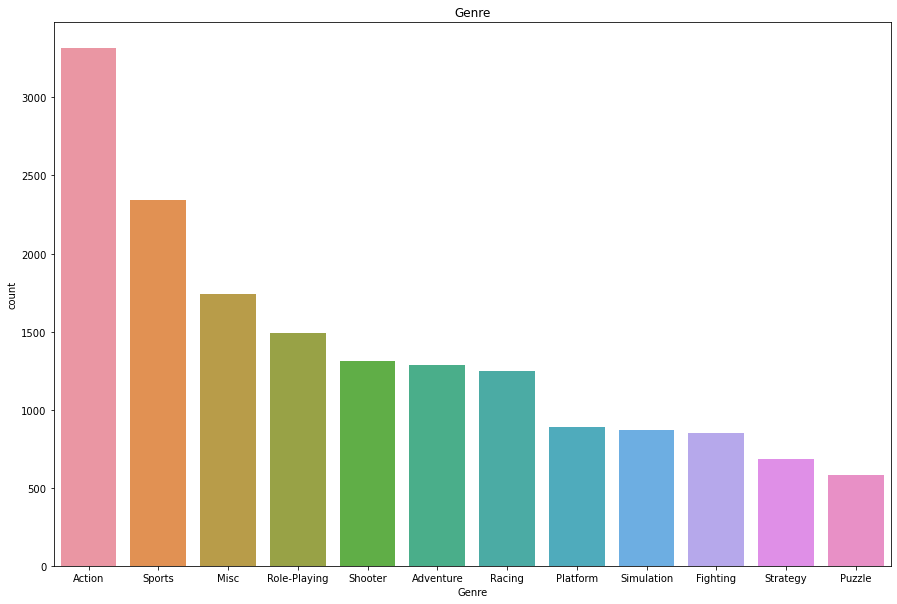

Action          19.978311
Sports          14.134233
Misc            10.477166
Role-Playing     8.964936
Shooter          7.892517
Adventure        7.747921
Racing           7.525003
Platform         5.337993
Simulation       5.223521
Fighting         5.109049
Strategy         4.102904
Puzzle           3.506447
Name: Genre, dtype: float64


In [28]:
plt.figure(figsize=(15, 10))
plt.title("Genre")
sns.countplot(x=full_data['Genre'], order=full_data['Genre'].value_counts().index)
plt.show()

print(full_data['Genre'].value_counts() / full_data.shape[0] * 100)

This shows that the most popular genres are action and sports. Again, this kinda follows our expectations. Action games are usually the most popular kind.

**Publisher**

Since there are too many publishers, let's just focus on the top 10 most popular publishers.

In [29]:
top_ten = full_data['Publisher'].value_counts().head(10)

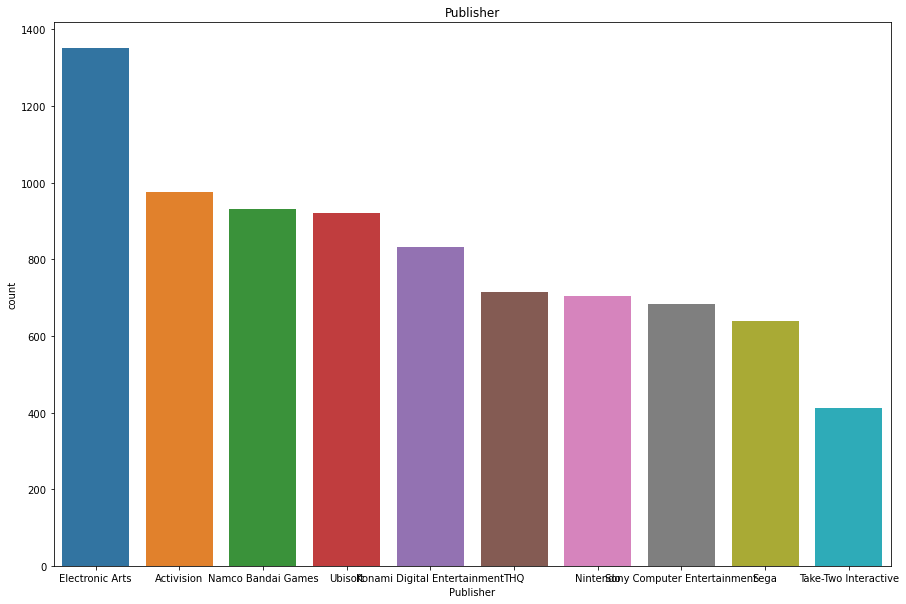

Electronic Arts                 8.139535
Activision                      5.874202
Namco Bandai Games              5.615134
Ubisoft                         5.548861
Konami Digital Entertainment    5.012652
THQ                             4.307748
Nintendo                        4.235450
Sony Computer Entertainment     4.114954
Sega                            3.849861
Take-Two Interactive            2.488252
Name: Publisher, dtype: float64


In [30]:
plt.figure(figsize=(15, 10))
plt.title("Publisher")
sns.countplot(x=full_data['Publisher'], order=top_ten.index)
plt.show()

print(top_ten / full_data.shape[0] * 100)

So basically the companies that sell the most amount of games are like EA, Activision, NBG, Ubisoft, and others. These companies are indeed the most famous ones out there.

**Sales in North America**

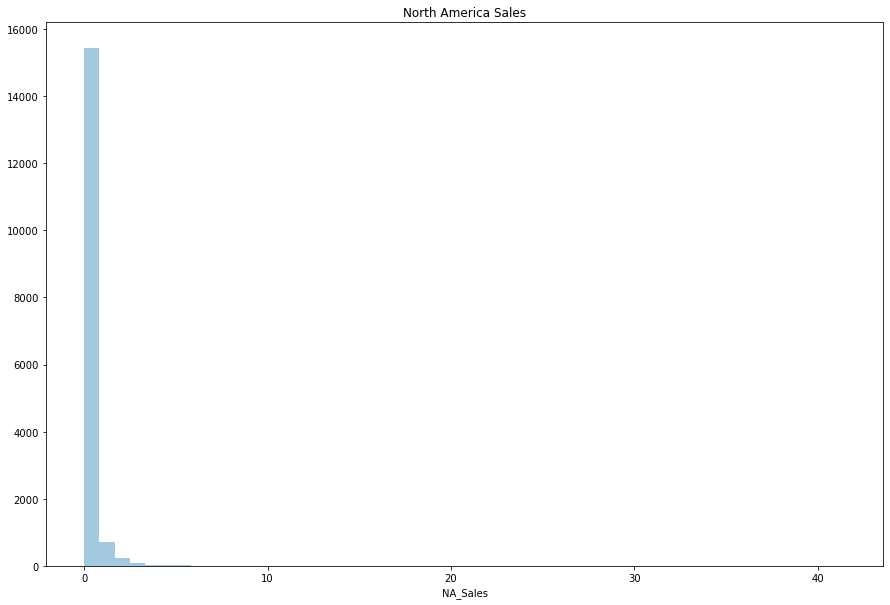

count    16598.000000
mean         0.264667
std          0.816683
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64


In [31]:
plt.figure(figsize=(15, 10))
plt.title("North America Sales")
sns.distplot(a=full_data['NA_Sales'], kde=False)
plt.show()

print(full_data['NA_Sales'].describe())

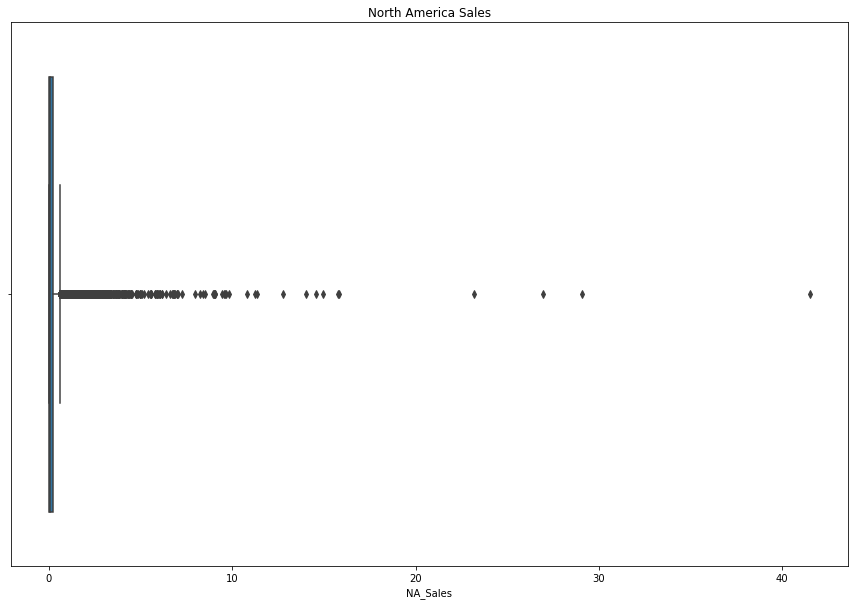

count    16598.000000
mean         0.264667
std          0.816683
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64


In [32]:
plt.figure(figsize=(15, 10))
plt.title("North America Sales")
sns.boxplot(x=full_data['NA_Sales'])
plt.show()

print(full_data['NA_Sales'].describe())

OK, so we see that the sales in North America is highly right-skewed. Most companies will not even make a million sales in NA, but there is a game that sold 41.49 million times! I wonder what game that is. Let's check out.

In [33]:
full_data.loc[full_data['NA_Sales'] == 41.49]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


Wii Sports it is. Also, this is actually the #1 game in the rank! No wonder why the game is this popular in North America.

**Sales in Europe**

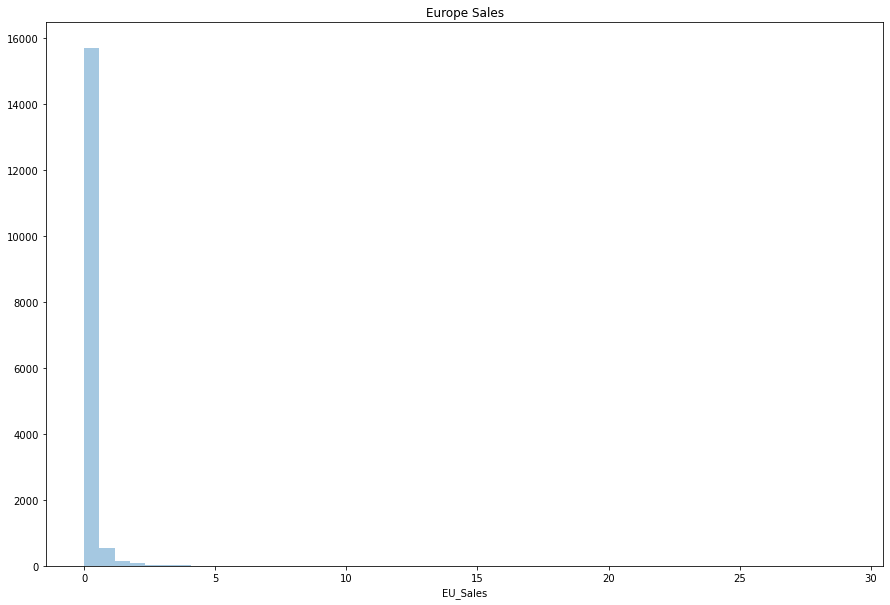

count    16598.000000
mean         0.146652
std          0.505351
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
Name: EU_Sales, dtype: float64


In [34]:
plt.figure(figsize=(15, 10))
plt.title("Europe Sales")
sns.distplot(a=full_data['EU_Sales'], kde=False)
plt.show()

print(full_data['EU_Sales'].describe())

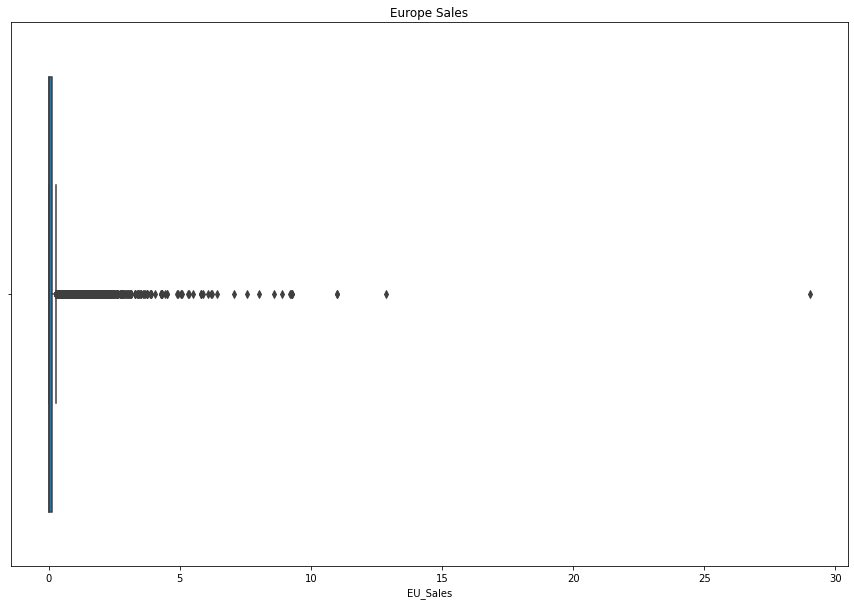

count    16598.000000
mean         0.146652
std          0.505351
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
Name: EU_Sales, dtype: float64


In [35]:
plt.figure(figsize=(15, 10))
plt.title("Europe Sales")
sns.boxplot(x=full_data['EU_Sales'])
plt.show()

print(full_data['EU_Sales'].describe())

Again, the distribution is highly right skewed. This again indicates that the video game market is somewhat an oligopoly. Most companies will only have a small share in the market, but there are a few that will sell exponentially more. Also, let's check which game has the most sales in Europe. 

In [36]:
full_data.loc[full_data['EU_Sales'] == 29.02]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


Well, it is again Wii Sports.

**Sales in Japan**

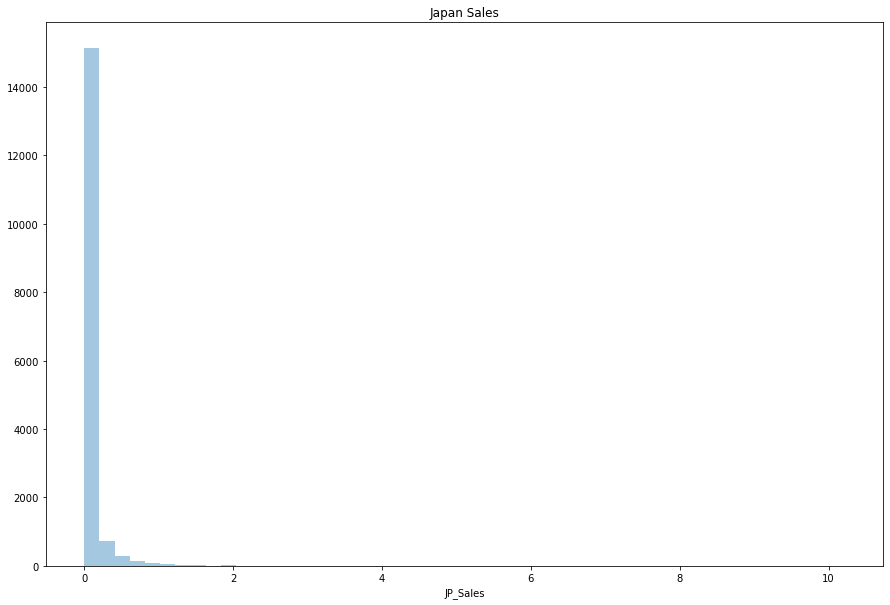

count    16598.000000
mean         0.077782
std          0.309291
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64


In [37]:
plt.figure(figsize=(15, 10))
plt.title("Japan Sales")
sns.distplot(a=full_data['JP_Sales'], kde=False)
plt.show()

print(full_data['JP_Sales'].describe())

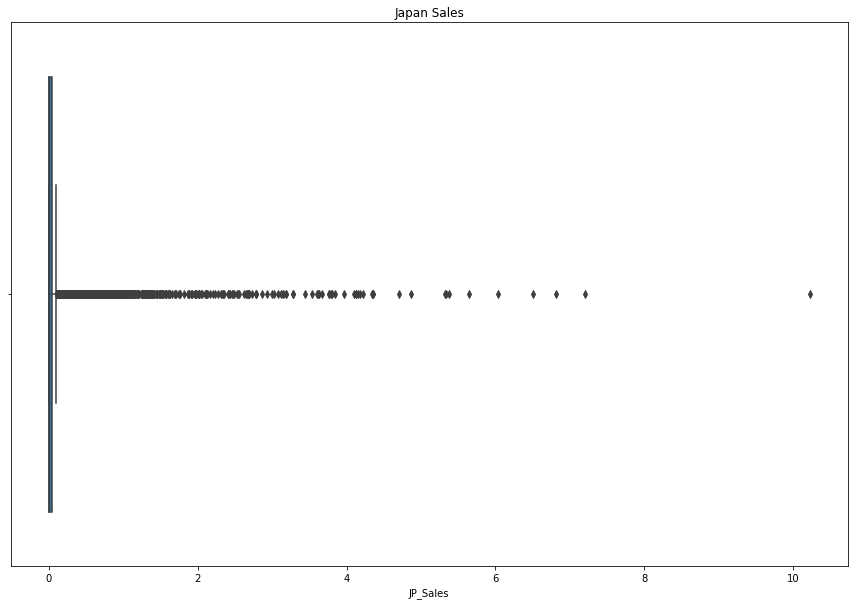

count    16598.000000
mean         0.077782
std          0.309291
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64


In [38]:
plt.figure(figsize=(15, 10))
plt.title("Japan Sales")
sns.boxplot(x=full_data['JP_Sales'])
plt.show()

print(full_data['JP_Sales'].describe())

Still right-skewed, and the game that has the most sale is:

In [39]:
full_data.loc[full_data['JP_Sales'] == 10.22]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


Wow! This time it is not Wii Sport! It is actually Pokemon Red/Blue! This is actually a surprise to me. I would though that since Wii Sport is the number 1 game and is from Japan, Wii Sport would be the number 1 at Japan too. I guess this is the beauty of data analysis.

**Sales in the rest of the world**

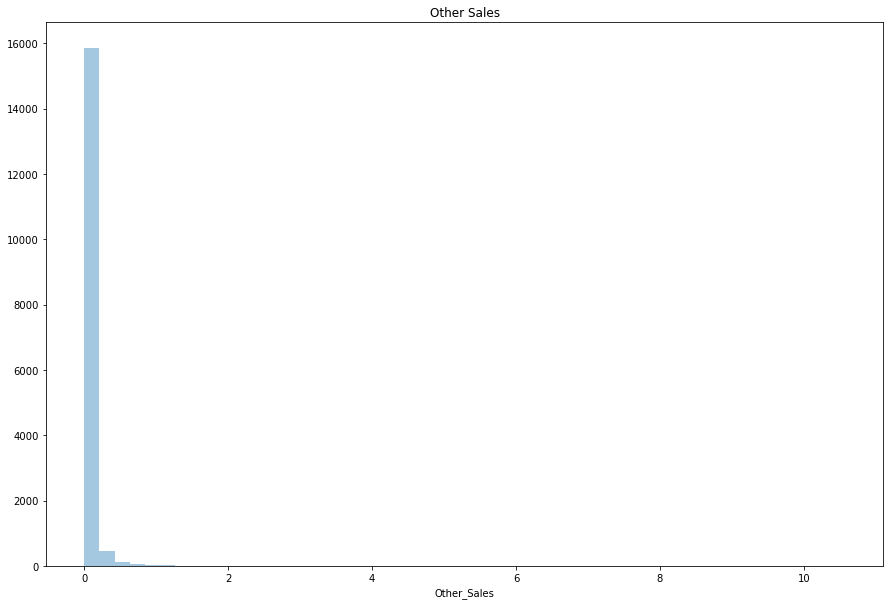

count    16598.000000
mean         0.048063
std          0.188588
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max         10.570000
Name: Other_Sales, dtype: float64


In [40]:
plt.figure(figsize=(15, 10))
plt.title("Other Sales")
sns.distplot(a=full_data['Other_Sales'], kde=False)
plt.show()

print(full_data['Other_Sales'].describe())

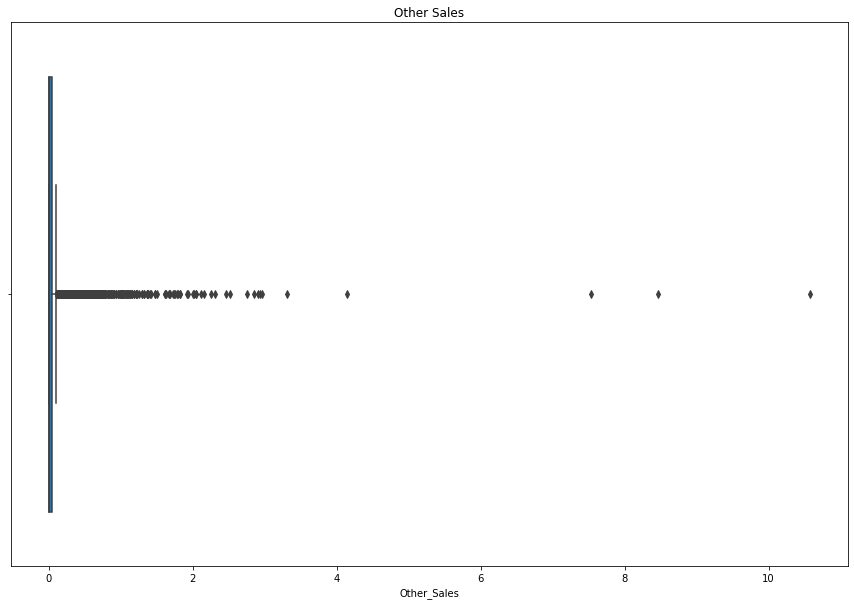

count    16598.000000
mean         0.048063
std          0.188588
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max         10.570000
Name: Other_Sales, dtype: float64


In [41]:
plt.figure(figsize=(15, 10))
plt.title("Other Sales")
sns.boxplot(x=full_data['Other_Sales'])
plt.show()

print(full_data['Other_Sales'].describe())

In [42]:
full_data.loc[full_data['Other_Sales'] == 10.57]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.4,0.41,10.57,20.81


OK, now for the other parts of the world, GTA San Andreas is actully the most sold game. Again, an interesting thing to learn. 

**Global Sales**

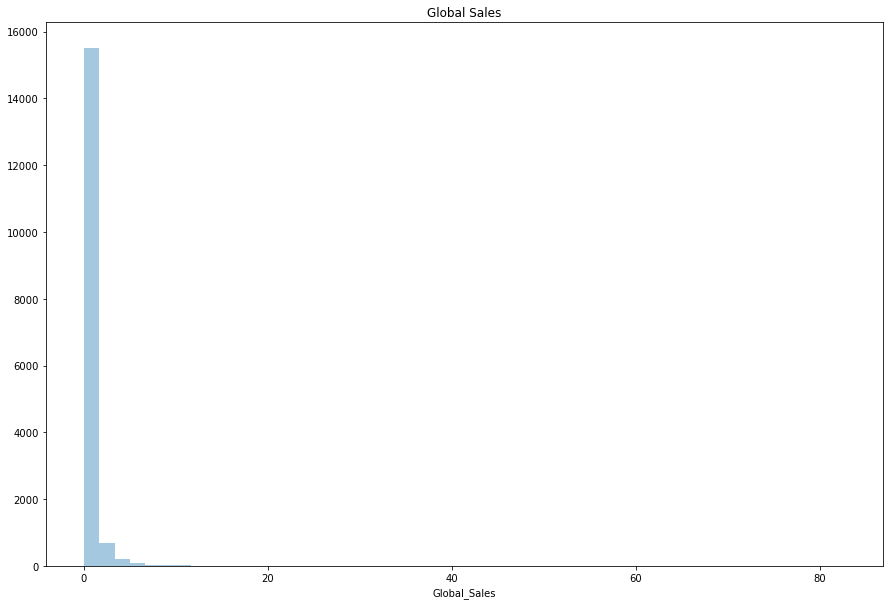

count    16598.000000
mean         0.537441
std          1.555028
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: Global_Sales, dtype: float64


In [43]:
plt.figure(figsize=(15, 10))
plt.title("Global Sales")
sns.distplot(a=full_data['Global_Sales'], kde=False)
plt.show()

print(full_data['Global_Sales'].describe())

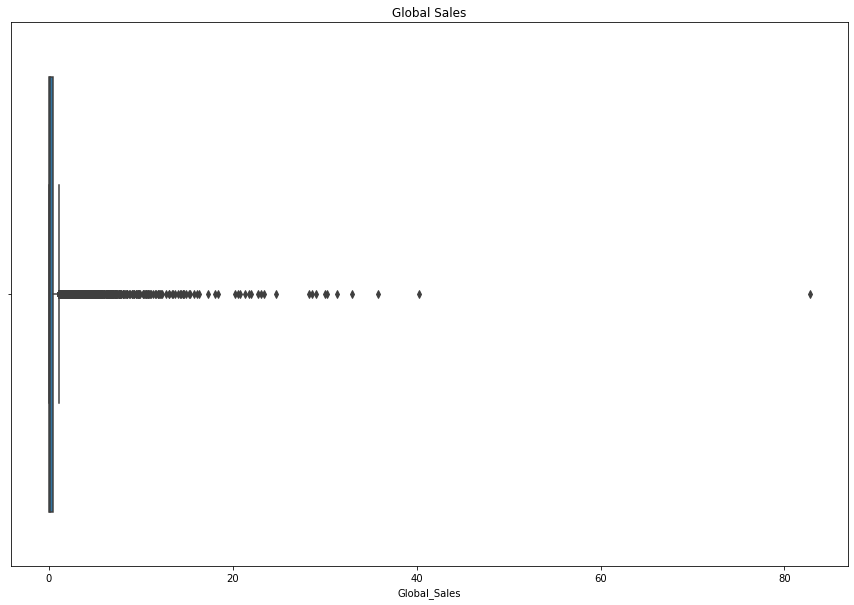

count    16598.000000
mean         0.537441
std          1.555028
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: Global_Sales, dtype: float64


In [44]:
plt.figure(figsize=(15, 10))
plt.title("Global Sales")
sns.boxplot(x=full_data['Global_Sales'])
plt.show()

print(full_data['Global_Sales'].describe())

In [45]:
full_data.loc[full_data['Global_Sales'] == 82.74]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


Now the global sales is shown. Again, it is visualized, and the game with the most sales is Wii Sport, which is indeed ranked #1 in our dataset.

# Define the Question

Now we have looked at the data, I begin to be curious about what factors will affect the global sales of a game. Obviously when predicting about this, we cannot use any of the region sale information or the rank as parameters for our model because that is data leakage. Therefore, we are left to only the Platform, Year, Genre, and Publisher columns. So I say let's now work on making a prediction of the global sales based on these four columns and see how accurate the prediction is.

# Other Parameters vs. Global Sales

Now since we are curious in how other parameters may affect the final global sales, let's actually visualize the associations between global sales and other parameters we are interested in. 

**Year vs. Global Sales**

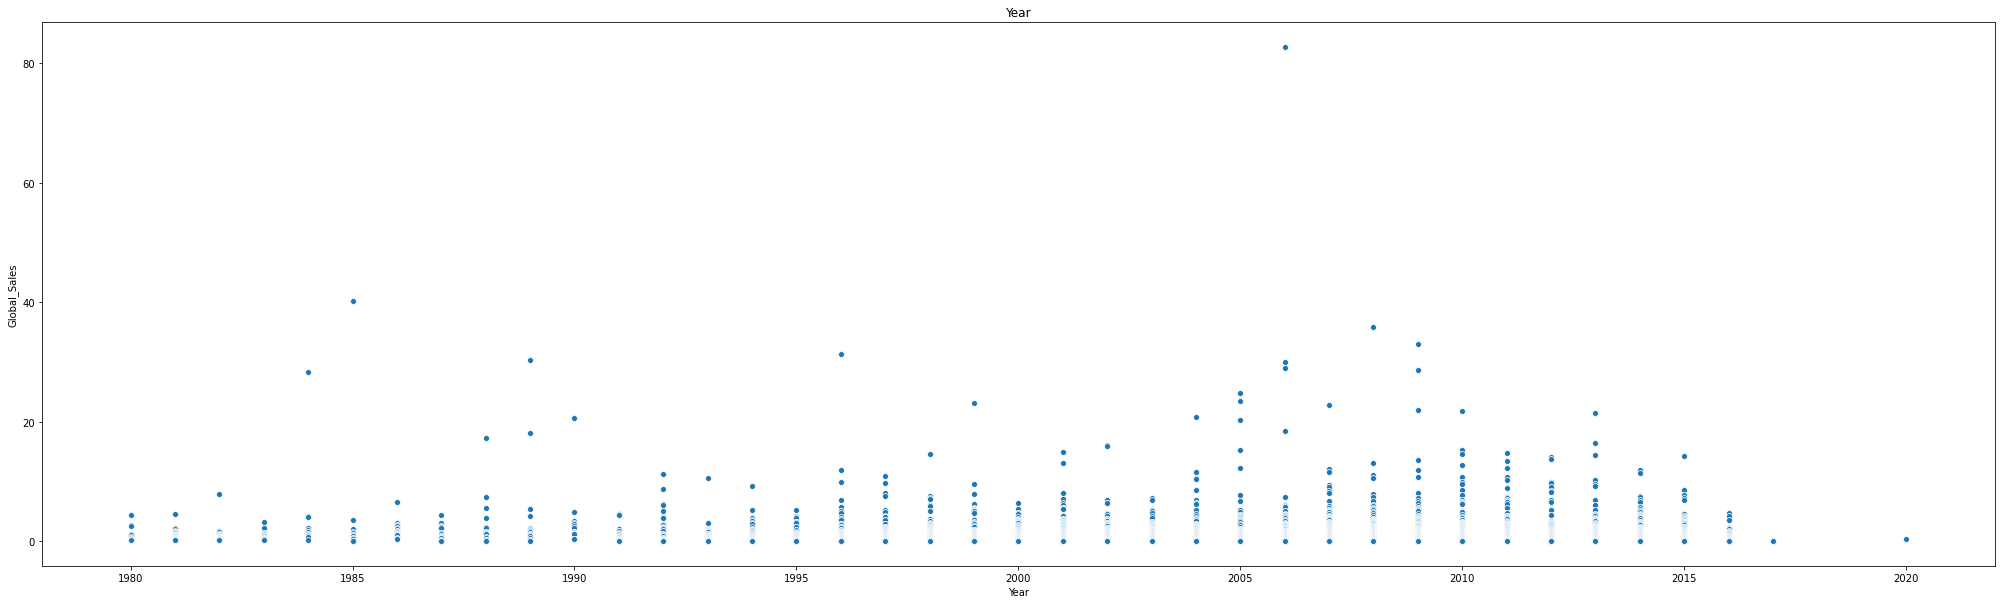

In [46]:
plt.figure(figsize=(35, 10))
plt.title("Year")
sns.scatterplot(x=full_data['Year'], y=full_data['Global_Sales'])
plt.show()

There isn't really an association between the year and the global sales of games. It is shown that most games would only make minimal global sales despite which year it is. So the global sale isn't really something that depends on the time.

**Platform vs. Global Sales**

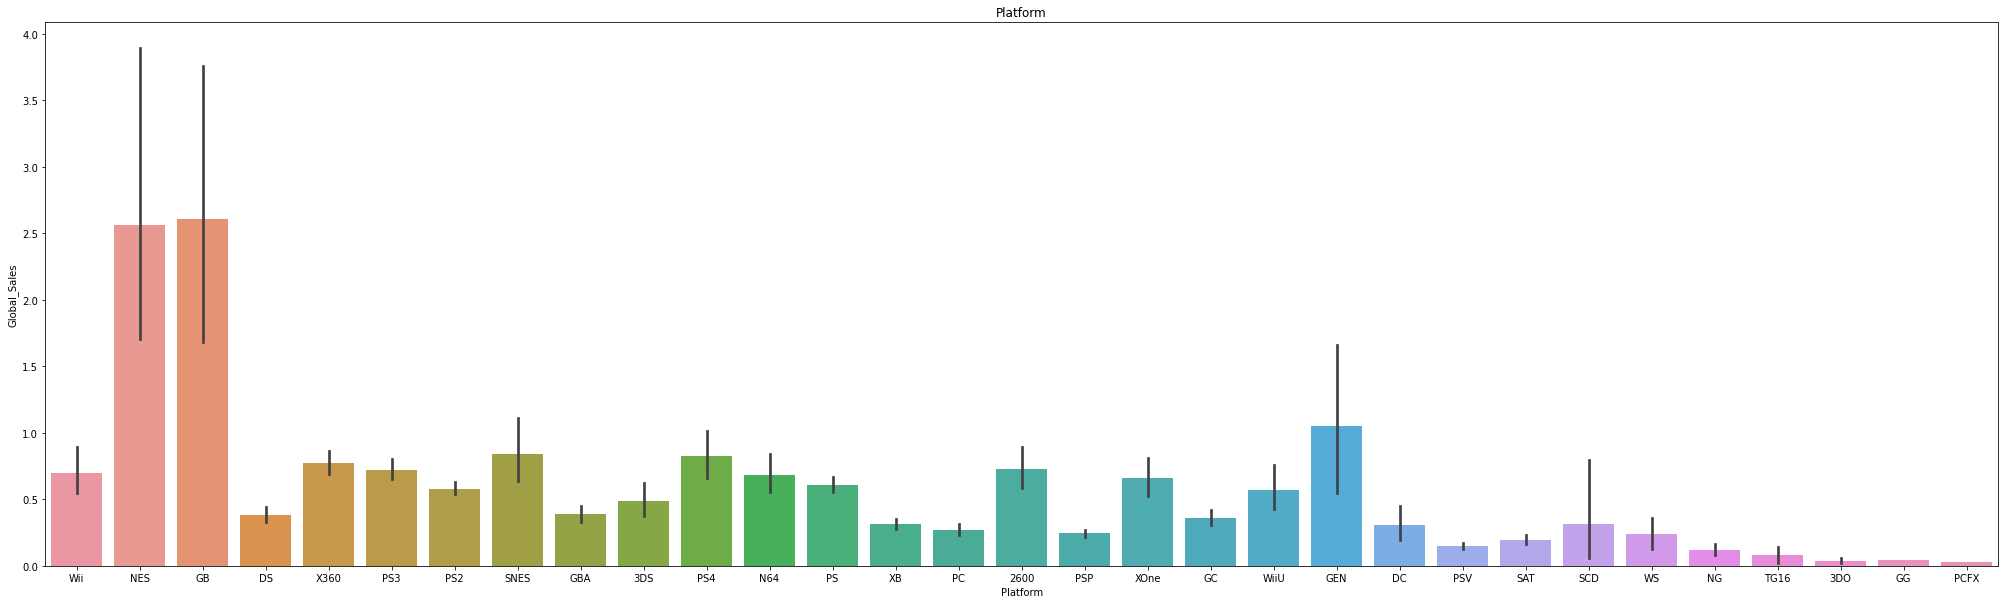

Wii   0.2
NES   1.375
GB   1.165
DS   0.11
X360   0.28
PS3   0.28
PS2   0.23
SNES   0.32
GBA   0.165
3DS   0.12
PS4   0.22
N64   0.27
PS   0.26
XB   0.14
PC   0.04
2600   0.46
PSP   0.09
XOne   0.24
GC   0.15
WiiU   0.23
GEN   0.15
DC   0.135
PSV   0.06
SAT   0.12
SCD   0.065
WS   0.215
NG   0.1
TG16   0.08
3DO   0.02
GG   0.04
PCFX   0.03


In [47]:
plt.figure(figsize=(35, 10))
plt.title("Platform")
sns.barplot(x=full_data['Platform'], y=full_data['Global_Sales'])
plt.show()

for plat in full_data['Platform'].unique():
    print(plat, " ", full_data.loc[full_data['Platform'] == plat, 'Global_Sales'].median())

So now there seems to be a little trend. It seems like games on platforms like Wii, NES, GB do have a higher global sales comparing to games on platforms like SAT. It is very likely that since devices like Wii are more popular, people are more likely to invest money on games that are on these platforms. 

**Genre vs. Global Sales**

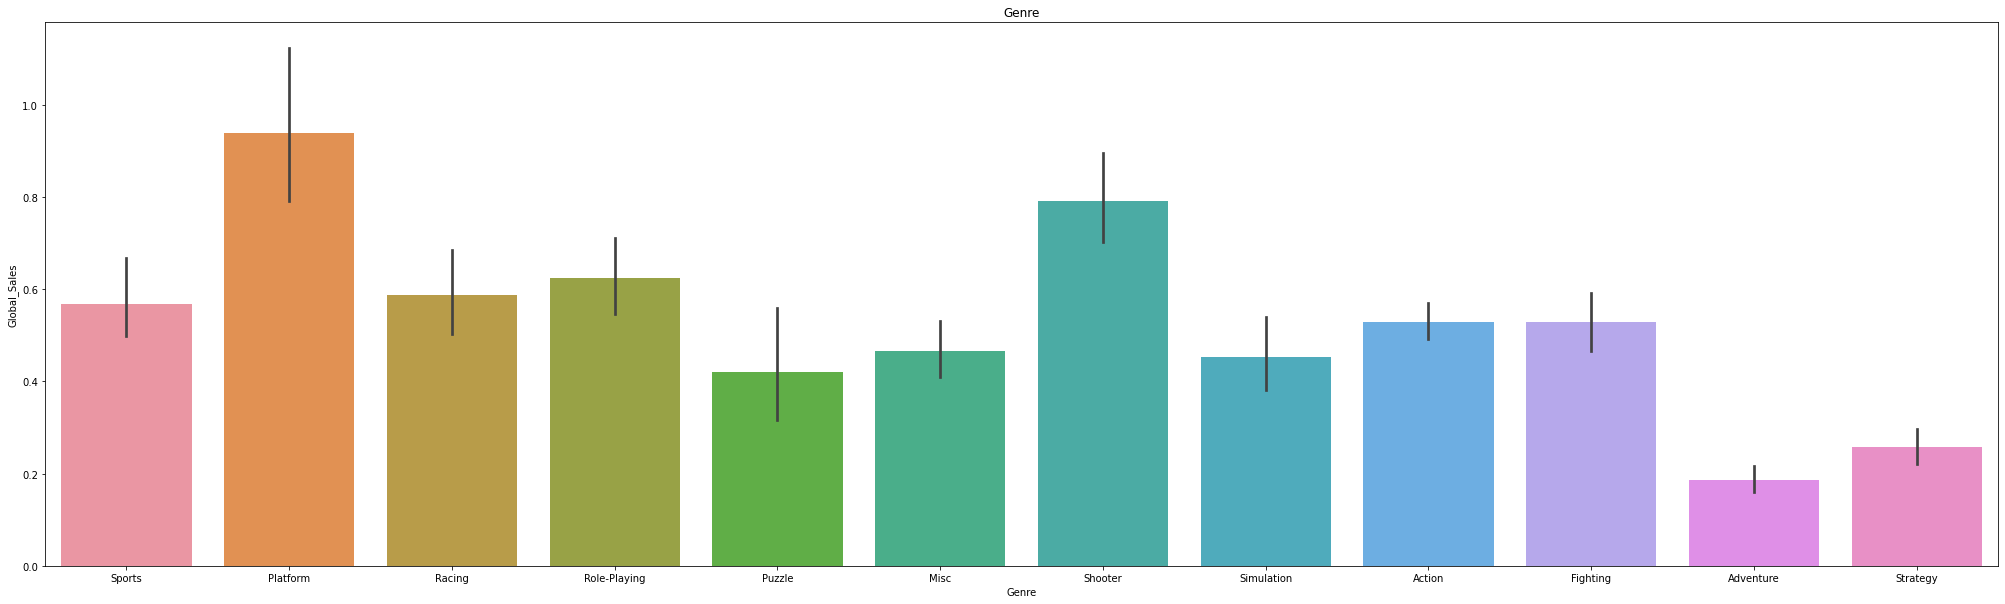

Sports   0.22
Platform   0.28
Racing   0.19
Role-Playing   0.185
Puzzle   0.11
Misc   0.16
Shooter   0.23
Simulation   0.16
Action   0.19
Fighting   0.21
Adventure   0.06
Strategy   0.09


In [48]:
plt.figure(figsize=(35, 10))
plt.title("Genre")
sns.barplot(x=full_data['Genre'], y=full_data['Global_Sales'])
plt.show()

for genr in full_data['Genre'].unique():
    print(genr, " ", full_data.loc[full_data['Genre'] == genr, 'Global_Sales'].median())

Again, small association between the genre of the game and the global sales. However, still not a significant association.

**Publisher vs. Global Sales**

In [49]:
sale_pbl = full_data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
# sale_pbl

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

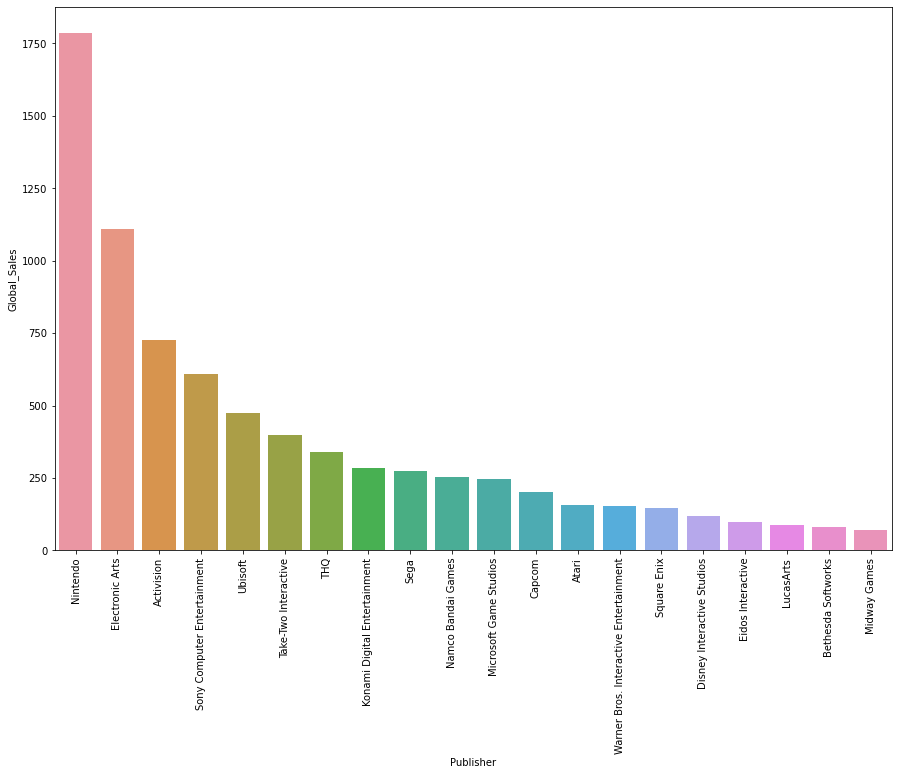

In [50]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

The publisher also seems to have an effect on the global sales. Essentially, companies like Nintendo or EA are more likely to make games that have high sales. 

In conclusion, among these four parameters, it seems like the Year doesn't have a huge impact on the global sale, but the other three parameters all have an impact to certain extent. 

# Model

In [51]:
num_features = []
cat_features = ['Platform', 'Genre', 'Publisher']

features = num_features + cat_features
X = full_data.drop(["Global_Sales"], axis=1)[features]
y = full_data["Global_Sales"]

num_transformer = SimpleImputer(strategy="constant")

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

base_models = [("DT_model", DecisionTreeRegressor(random_state=42)),
               ("RF_model", RandomForestRegressor(random_state=42,n_jobs=-1)),
               ("GB_model", GradientBoostingRegressor(random_state=42)),
               ("Ada_model", AdaBoostRegressor(random_state=42)),
               ("KNN_model", KNeighborsRegressor(n_jobs=-1))]

kfolds = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

for name, model in base_models:
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    
    model_steps.fit(X_train, y_train)

    model_preds = model_steps.predict(X_test)

    print(f"{name} mean squared error result: {mean_squared_error(y_test, model_preds)}")

DT_model mean squared error result: 3.2137796464619712
RF_model mean squared error result: 3.1735327400883566
GB_model mean squared error result: 3.208400155874944
Ada_model mean squared error result: 4.402157328889326
KNN_model mean squared error result: 3.5410205031325295


So these are the performances of baseline models. From the results we can see Random Forest is again the best baseline model.

In [53]:
param_grid = { 
    'n_estimators': [100, 500, 1000],
    'max_depth' : [3, 5, 8, None],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [54]:
final_RF_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None, max_features='auto')

model_steps = Pipeline(steps=[('preprocessor', preprocessor), ('model', final_RF_model)])

model_steps.fit(X_train, y_train)

model_preds = model_steps.predict(X_test)

print("Mean Squared Error: ", mean_squared_error(y_test, model_preds))

Mean Squared Error:  3.1735327400883566


After tuning parameters, I found the default parameters actually have the lowest error. So the final performance of our model is a 3.17 mean squred error when predicting global sales for a video game.